In [95]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\yangy\Desktop\YONG\datasets\movies.csv')


In [96]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [97]:
#check null 

for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print(col,pct_missing)

name 0.0
rating 0.010041731872717789
genre 0.0
year 0.0
released 0.0002608242044861763
score 0.0003912363067292645
votes 0.0003912363067292645
director 0.0
writer 0.0003912363067292645
star 0.00013041210224308815
country 0.0003912363067292645
budget 0.2831246739697444
gross 0.02464788732394366
company 0.002217005738132499
runtime 0.0005216484089723526


In [98]:
df.isnull().sum()


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [99]:
df=df.dropna()

In [100]:
# data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [101]:
#change date type of columns

df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [160]:
# removing country information
def remove(x):
   return (x.split('(')[0])
df['Year_correct']=df[['released']].applymap(remove)
df.dtypes

name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes           float64
director         object
writer           object
star             object
country          object
budget            int64
gross             int64
company          object
runtime         float64
Year_correct     object
dtype: object

In [165]:

# collecting correct year 
df['Year_correct']=df['Year_correct'].astype(str).str[-5:]


In [201]:
df['Year_correct'].head()

0    1980
1    1980
2    1980
3    1980
4    1980
Name: Year_correct, dtype: int64

In [167]:
df['Year_correct']=df['Year_correct'].astype('int64')

In [168]:
# drop duplicates

df['name']=df['name'].drop_duplicates()

In [200]:
df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_correct
0,4692,6,6,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980


In [194]:
df=df.drop(columns=['year', 'released'])


KeyError: "['year' 'released'] not found in axis"

Text(0, 0.5, 'gross earning')

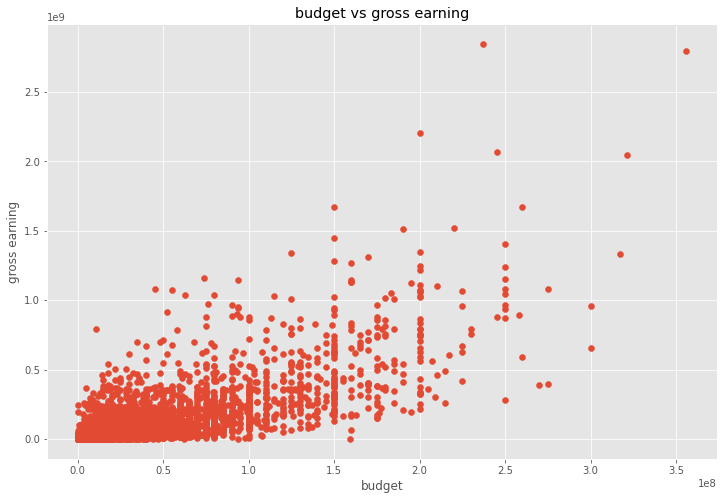

In [170]:
# scatter plot budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('budget vs gross earning')
plt.xlabel('budget')
plt.ylabel('gross earning')

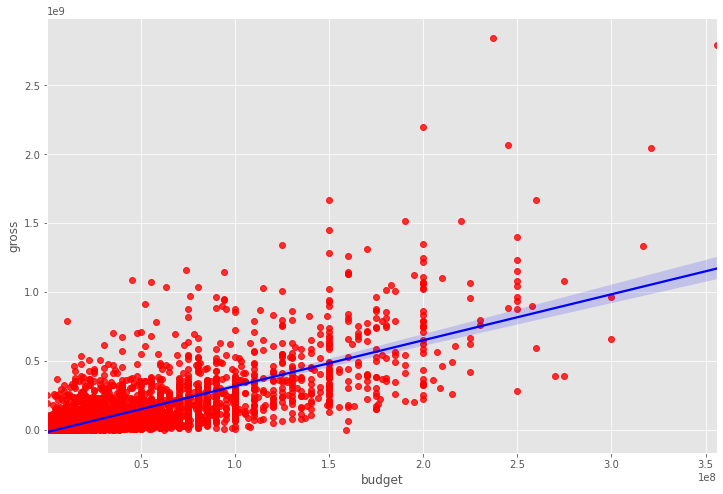

In [171]:
# plot budget vs gross using seaborn

sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [172]:
#correlation  budget and gross have the highest correlation
df.corr()

,year,score,votes,budget,gross,runtime,Year_correct
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
Year_correct,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


Text(86.09375, 0.5, 'Movie factors')

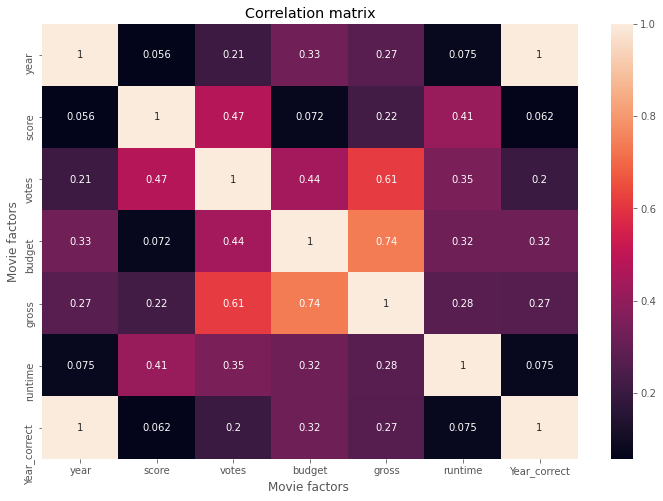

In [173]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation matrix')
plt.xlabel('Movie factors ')
plt.ylabel('Movie factors')

In [193]:
# look at company 
df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_correct
0,4692,6,6,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980


In [195]:
df_numerized=df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_correct
0,4692,6,6,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980
5,1509,6,9,6.4,123000.0,1758,3081,155,47,550000,39754601,1108,95.0,1980
6,3930,6,0,7.9,188000.0,974,576,860,47,27000000,115229890,1397,133.0,1980
7,3122,6,3,8.2,330000.0,1269,1257,1469,47,18000000,23402427,390,129.0,1980
8,3732,4,0,6.8,101000.0,1606,1402,595,47,54000000,108185706,548,127.0,1981
9,4401,6,3,7.0,10000.0,2011,280,402,47,10000000,15795189,1391,100.0,1980


Text(86.09375, 0.5, 'Movie factors')

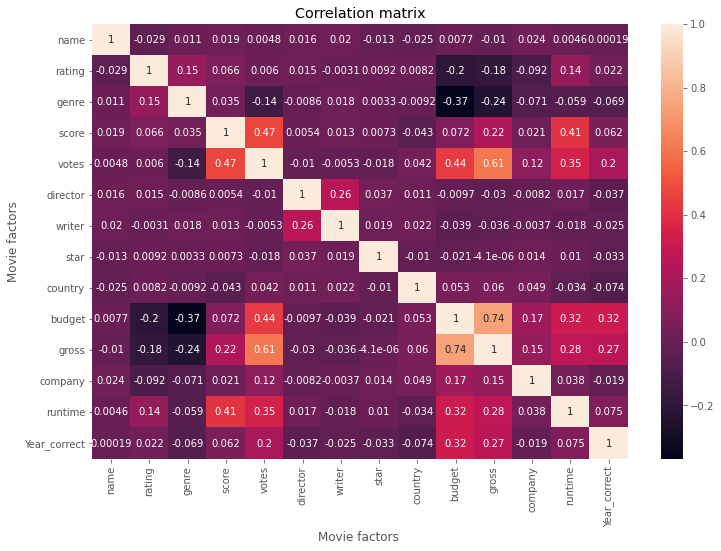

In [196]:
correlation_matrix=df_numerized.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation matrix')
plt.xlabel('Movie factors ')
plt.ylabel('Movie factors')

In [197]:
cor_pair=df_numerized.corr().unstack()

In [198]:
sorted=cor_pair.sort_values()

In [199]:
#votes and budget have the highest correlation to gross earning
sorted[sorted>0.5].drop_duplicates()

votes  gross     0.614751
gross  budget    0.740247
name   name      1.000000
dtype: float64